In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [50 lines of output]
  Traceback (most recent call last):
    File "C:\Users\muhil\AppData\Local\Temp\pip-build-env-qxrmso24\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\muhil\AppData\Local\Temp\pip-build-env-qxrmso24\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\muhil\AppData\Local\Temp\pip-build-env-qxrmso24\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\muhil\AppData\Local\Temp\pip-build-env-qxrmso24\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.7.2
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
azure-core                1.26.4
azure-cosmos              4.3.1
azure-functions           1.14.0
azure-storage-blob        12.16.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.0.0
blinker                   1.7.0
certifi                   2023.5.7
cffi                      1.15.1
charset-normalizer        3.1.0
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cryptography              41.0.1
cycler                    0.12.1
deap                      1.4.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml    

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[]

In [5]:
!pip install opencv-python

In [97]:

import cv2
import imghdr
data_dir = 'C:\\Users\\muhil\\Documents\\Machine_learning_project\\Dataset' 
image_exts = ['jpeg','jpg', 'bmp', 'png','webp']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\800px-Feral_cat_1.JPG.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\800px-Juvenile_Ragdoll.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\ayful-tabby-cat-jumping-mid-air-looking-at-camera-background-with-2315020963.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\cat-g9rdx9uk2425fip2.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\cat-pictures-zc3gu0636kmldm04.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\cute-little-red-kitten-sleeps-600nw-235089946.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\funny-cat-flying-photo-playful-260nw-2315020963.jpg
Image not in ext list C:\Users\muhil\Documents\Machine_learning_project\Dataset\Cats\Himalayan-chocolate-point

In [98]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 905 files belonging to 2 classes.


In [99]:
data_iterator = data.as_numpy_iterator()

In [100]:
batch = data_iterator.next()

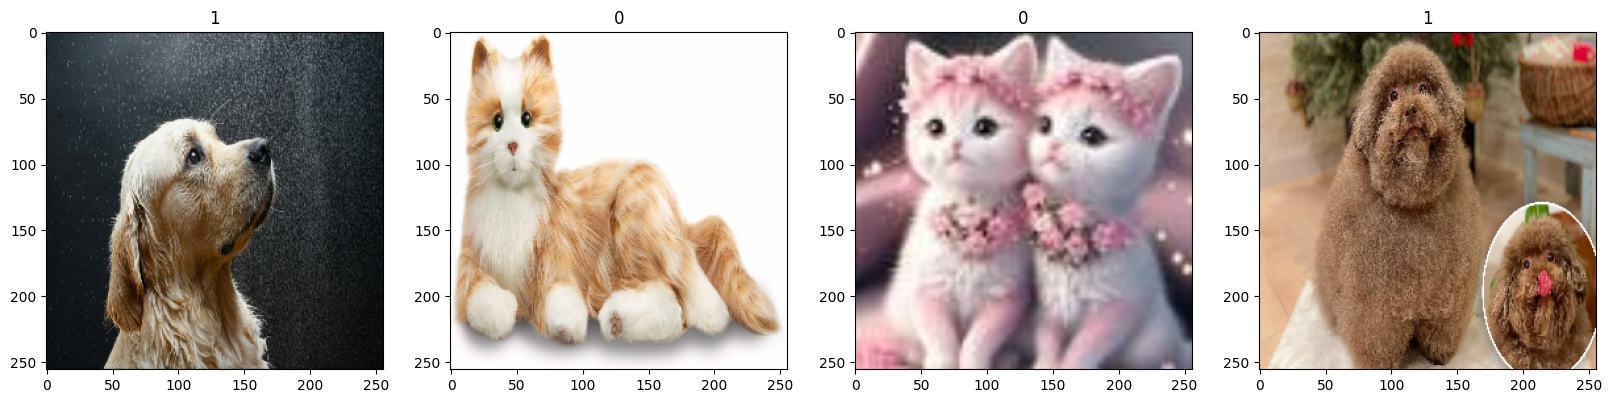

In [101]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [102]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [103]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [138]:
model = Sequential()

In [139]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [140]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
logdir='C:\\Users\\muhil\\Documents\\Machine_learning_project\\logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - accuracy: 0.5012 - loss: 0.8122 - val_accuracy: 0.6875 - val_loss: 0.6727
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 618ms/step - accuracy: 0.5870 - loss: 0.6589 - val_accuracy: 0.6875 - val_loss: 0.6105
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 617ms/step - accuracy: 0.6372 - loss: 0.6280 - val_accuracy: 0.6250 - val_loss: 0.6270
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 616ms/step - accuracy: 0.6517 - loss: 0.6356 - val_accuracy: 0.7312 - val_loss: 0.5033
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 625ms/step - accuracy: 0.7131 - loss: 0.5329 - val_accuracy: 0.8000 - val_loss: 0.4615
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 621ms/step - accuracy: 0.7992 - loss: 0.4433 - val_accuracy: 0.8250 - val_loss: 0.3651
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 616ms/step - accuracy: 0.8727 - loss: 0.3335 - val_accuracy: 0.8562 - val_loss: 0.3226
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 619ms/step - accuracy: 0.9064 - loss: 0.2389 - val_accu

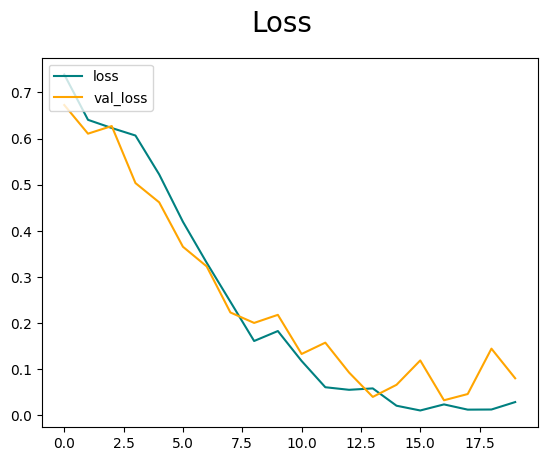

In [143]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

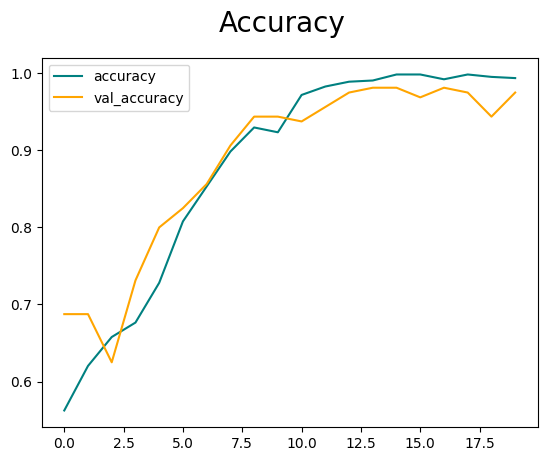

In [144]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [145]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.95, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
ypred= model.predict(np.expand_dims(resize/255, 0))
if ypred > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('C:\\Users\\muhil\\Documents\\Machine_learning_project\\model','DogCat.h5'))